# Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np

import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Import data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Split into X and target

In [3]:
train1 = train.drop('Machine failure', axis=1)
y = train['Machine failure']

# Combine train and test sets

In [4]:
X = pd.concat([train1, test]).reset_index(drop=True)

# Basic Data Exploration

In [5]:
X.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [6]:
X.tail()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
227378,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
227379,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
227380,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
227381,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0
227382,227382,L52525,L,303.5,312.8,1534,36.1,92,0,0,0,0,0


In [7]:
X.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
count,227383.000000,227383.000000,227383.000000,227383.000000,227383.000000,227383.000000,227383.000000,227383.000000,227383.000000,227383.000000,227383.000000
mean,113691.000000,299.861463,309.940392,1520.409938,40.343262,104.362925,0.001522,0.005233,0.002379,0.003923,0.002278
std,65639.962467,1.860371,1.385219,139.231189,8.503195,63.927361,0.038979,0.072153,0.048720,0.062510,0.047675
min,0.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56845.500000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,113691.000000,300.000000,310.000000,1493.000000,40.500000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,170536.500000,301.200000,310.900000,1579.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,227382.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
X.shape

(227383, 13)

In [9]:
X.id.nunique()

227383

In [10]:
X['Product ID'].nunique()

9995

In [11]:
X.Type.value_counts()

L    158792
M     53687
H     14904
Name: Type, dtype: int64

# Data Cleaning

In [12]:
X.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [13]:
X.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [14]:
X1 = X.copy()

X1 = X1.drop(columns=['id', 'Product ID'])#, 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])

# Data Transformation

In [15]:
# encoder = OneHotEncoder()
# encoder.fit(X1.Type.values.reshape(-1, 1))
# encoder_type = encoder.transform(X1.Type.values.reshape(-1, 1)).toarray()

In [16]:
dummies = pd.get_dummies(X1.Type, prefix='Type', drop_first=True)
X1 = pd.concat([X1, dummies], axis='columns')
X1 = X1.drop(['Type'], axis='columns')

In [17]:
X2 = X1.copy()

In [18]:
scaler = MinMaxScaler()

scaler.fit(X2)
X2 = pd.DataFrame(scaler.transform(X2), index=X2.index, columns=X2.columns)

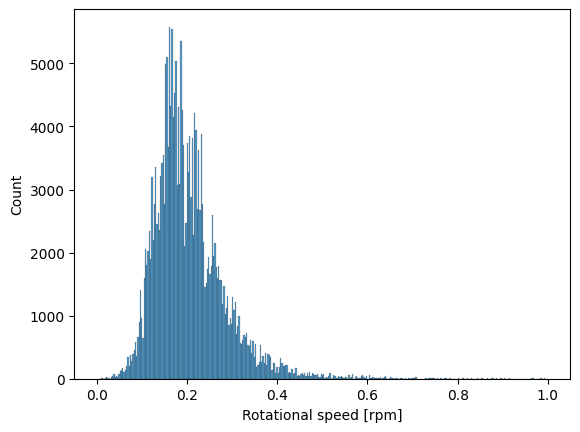

In [19]:
sns.histplot(X2['Rotational speed [rpm]'])
plt.show()

In [20]:
X3 = X2.copy()

In [21]:
skew_cols = []
for col in X3.columns.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type_M']):
    if scipy.stats.skew(X3[col])>=1:
        print(col, 'skewness:', scipy.stats.skew(X3[col]))
        skew_cols.append(col)

Rotational speed [rpm] skewness: 1.9123753127313237


In [22]:
skew_cols

['Rotational speed [rpm]']

In [23]:
for col in skew_cols:
    X3[col] = np.log1p(X3[col])

# Split train and test sets

In [24]:
X4 = X3.iloc[:136429, :]
test_final = X3.iloc[136429:, :]

# Target Variable

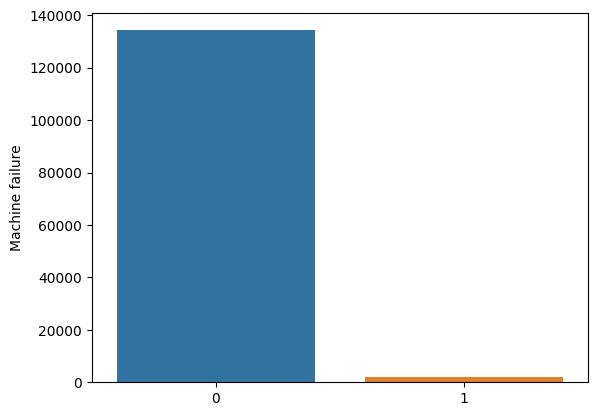

In [25]:
sns.barplot(x=y.unique(), y=y.value_counts())
plt.show()

In [26]:
y.value_counts()

0    134281
1      2148
Name: Machine failure, dtype: int64

In [27]:
round(y.value_counts()[0]/y.shape[0], 4)

0.9843

In [29]:
print('Shape of train data before oversampling:', X4.shape)
sm = SMOTE(random_state=42)
X5, y = sm.fit_resample(X4, y)
print('Shape of train data after oversampling:', X5.shape)

Shape of train data before oversampling: (136429, 12)
Shape of train data after oversampling: (268562, 12)


# Base Model

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X5, y, test_size=.2, random_state=0)

In [31]:
model = RandomForestClassifier(random_state=0)

In [32]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_pred = model.predict_proba(X_test)[:, 1]

# Model Evaluation

In [34]:
# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred)
print("Area under ROC curve:", roc_auc)

Area under ROC curve: 0.9995454107347576


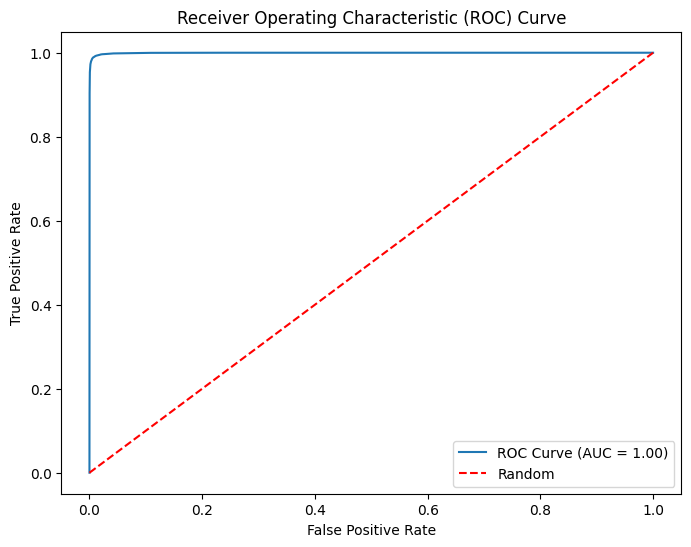

In [35]:
# Compute the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Prediction

In [36]:
y_pred_1 = model.predict(test_final)

# Submission

In [37]:
sample_submission['Machine failure'] = y_pred_1

In [38]:
sample_submission.to_csv('base_submission_oversampled.csv', index=False)